In [1]:
%matplotlib inline
import importlib
# import utils2; importlib.reload(utils2)
# from utils2 import *

In [ ]:

def res_block(inp, kernel_size): 
    num_outputs = inp.get_shape()[-1].value
    h1 = Convolution2D(nb_filter=num_outputs, nb_row=kernel_size, nb_col=kernel_size, 
                      subsample=1)

In [11]:
x = Input(shape=(220, 220, 3))
#TODO: Mirror padding instead of zero-padding; use old module for that 
x = Convolution2D(nb_filter=32, nb_row=9, nb_col=9, subsample=(1, 1), border_mode='same')(x)
print(x.get_shape())
x = Convolution2D(nb_filter=64, nb_row=3, nb_col=3, subsample=(2, 2), border_mode='same')(x)
print(x.get_shape())
x = Convolution2D(nb_filter=128, nb_row=3, nb_col=3, subsample=(2, 2), border_mode='same')(x)
print(x.get_shape())

(?, 220, 220, 32)
(?, 110, 110, 64)
(?, 55, 55, 128)


Start with an image of size 220 by 220, with 3 channels, each of which contains color information. 
Then, create a convolutional layer with 32 9x9 filters, with a stride of 1 in each direction, and a border mode of 'same', meaning that every pixel in the input volume has a convolution for which it is the center of the convolution (modulo changes for subsampling) 

In [1]:
import tensorflow as tf
slim = tf.contrib.slim

In [2]:
sess = tf.InteractiveSession()
x = tf.Variable([1.0, 2.0])

In [37]:
style_labels = tf.constant([[0, 1], [6, 7], [9, 5]])

In [38]:
style_labels.shape

TensorShape([Dimension(3), Dimension(2)])

In [39]:
style_labels.eval()

array([[0, 1],
       [6, 7],
       [9, 5]], dtype=int32)

In [ ]:
style_labels = []

In [ ]:
tf.nn.batch_normalization()

In [26]:
tf.expand_dims(tf.expand_dims(foo, 1), 1)

<tf.Tensor 'ExpandDims_6:0' shape=(2, 1, 1, 3) dtype=int32>

In [40]:
shape = tf.TensorShape([4]).concatenate(6)

In [41]:
shape

TensorShape([Dimension(4), Dimension(6)])

In [43]:
beta = slim.model_variable('beta2',
                                shape=shape,
                                dtype='float64',
                                initializer=tf.zeros_initializer())

In [50]:
tf.global_variables_initializer().run()

In [53]:
style_labels = tf.constant([0, 0, 3, 0, 1, 2])

In [ ]:
tf.gather()

In [54]:
tf.gather(beta, style_labels).eval()

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
shape = tf.TensorShape([num_categories]).concatenate(params_shape)
var_collections = slim.utils.get_variable_collections(
  variables_collections, name)
var = slim.model_variable(name,
                        shape=shape,
                        dtype=dtype,
                        initializer=initializer,
                        collections=var_collections,
                        trainable=trainable)
conditioned_var = tf.gather(var, labels)
conditioned_var = tf.expand_dims(tf.expand_dims(conditioned_var, 1), 1)
return conditioned_var

In [6]:
from keras.layers import Input

In [7]:
from keras.layers import merge

In [5]:
inp = Input(shape=(3,))

In [8]:
inp.shape[1]

Dimension(3)

In [14]:
x = merge([inp for i in range(10)], mode='concat')

In [8]:
from keras import backend as K 

In [16]:
K.reshape(x, shape=(10, 3))

<tf.Tensor 'Reshape:0' shape=(10, 3) dtype=float32>

## Conditional Instance Normalization Layer

In [2]:
from keras.layers import Input, Convolution2D

Using TensorFlow backend.


In [3]:
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
import pdb
import keras
from keras.engine.topology import to_list
from keras.engine.topology import Layer, InputSpec
from keras import initializations, regularizers
from keras import backend as K 
from keras.layers import merge

In [37]:
class ConditionalInstanceNormalization(Layer):
    """Builds upon (i.e. borrows liberally from) the existing Batch
    Normalization layer within Keras, but then implements Conditional Instance Normalization
    as described here: https://arxiv.org/pdf/1610.07629.pdf
    # Arguments
        num_categories: The number of categories upon which you're conditionally normalizing.
                        If using for style transfer, this corresponds to the
                        number of distinct styles. Set to 2 by default.

        axis: Integer, the axis that should be normalized
            (typically the features axis).
            For instance, after a `Conv2D` layer with
            `data_format="channels_first"`,
            set `axis=1` in `BatchNormalization`.

        momentum: Momentum for the moving average.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
            When the next layer is linear (also e.g. `nn.relu`),
            this can be disabled since the scaling
            will be done by the next layer.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        moving_mean_initializer: Initializer for the moving mean.
        moving_variance_initializer: Initializer for the moving variance.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
    # Output shape
        Same shape as input.
    # References
TODO
"""
    def __init__(self, num_categories=2, epsilon=1e-3, mode=0, axis=-1, momentum=0.99,
                 weights=None, beta_init='zero', gamma_init='one',
                 gamma_regularizer=None, beta_regularizer=None, **kwargs):
        self.supports_masking = True
        self.num_categories=2
        self.beta_init = initializations.get(beta_init)
        self.gamma_init = initializations.get(gamma_init)
        self.epsilon = epsilon
        self.mode = mode
        self.axis = axis
        self.momentum = momentum
        self.gamma_regularizer = regularizers.get(gamma_regularizer)
        self.beta_regularizer = regularizers.get(beta_regularizer)
        self.initial_weights = weights
        if self.mode == 0:
            self.uses_learning_phase = True
        super(ConditionalInstanceNormalization, self).__init__(**kwargs)

    def build(self, input_shape):

        feature_dim = input_shape[0][self.axis]
        row_shape = (feature_dim,)
        shape = (self.num_categories, feature_dim)

        self.gamma = K.reshape(merge([self.add_weight(row_shape,
                                             name='gamma',
                                             initializer=self.gamma_init,
                                             regularizer=self.gamma_regularizer) for i in range(self.num_categories)],
                                   mode='concat'), shape=shape)

        self.beta = K.reshape(merge([self.add_weight(row_shape,
                                             name='beta',
                                             initializer=self.beta_init,
                                             regularizer=self.beta_regularizer) for i in range(self.num_categories)],
                                   mode='concat'), shape=shape)

        self.running_mean = self.add_weight(row_shape, initializer='zero',
                                                name='{}_running_mean'.format(self.name),
                                                trainable=False)

        self.running_std = self.add_weight(row_shape, initializer='one',
                                           name='{}_running_std'.format(self.name),
                                           trainable=False)

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True


#     def __call__(self, x, mask=None):
#             '''Wrapper around self.call(), for handling
#             internal Keras references.

#             If a Keras tensor is passed:
#                 - We call self.add_inbound_node().
#                 - If necessary, we `build` the layer to match
#                     the _keras_shape of the input(s).
#                 - We update the _keras_shape of every input tensor with
#                     its new shape (obtained via self.get_output_shape_for).
#                     This is done as part of add_inbound_node().
#                 - We update the _keras_history of the output tensor(s)
#                     with the current layer.
#                     This is done as part of add_inbound_node().

#             # Arguments
#                 x: Can be a tensor or list/tuple of tensors.
#                 mask: Tensor or list/tuple of tensors.
#             '''
#             pdb.set_trace()
#             if not self.built:
#                 # Raise exceptions in case the input is not compatible
#                 # with the input_spec specified in the layer constructor.
#                 self.assert_input_compatibility(x)

#                 # Collect input shapes to build layer.
#                 input_shapes = []
#                 for x_elem in x:
#                     if hasattr(x_elem, '_keras_shape'):
#                         input_shapes.append(x_elem._keras_shape)
#                     elif hasattr(K, 'int_shape'):
#                         input_shapes.append(K.int_shape(x_elem))
#                     else:
#                         raise ValueError('You tried to call layer "' + self.name +
#                                          '". This layer has no information'
#                                          ' about its expected input shape, '
#                                          'and thus cannot be built. '
#                                          'You can build it manually via: '
#                                          '`layer.build(batch_input_shape)`')
#                 if len(input_shapes) == 1:
#                     self.build(input_shapes[0])
#                 else:
#                     self.build(input_shapes)
#                 self.built = True

#             # Raise exceptions in case the input is not compatible
#             # with the input_spec set at build time.

#             self.assert_input_compatibility(x)

#             input_tensors = x
#             inbound_layers = []
#             node_indices = []
#             tensor_indices = []
#             for input_tensor in input_tensors:
#                 if hasattr(input_tensor, '_keras_history') and input_tensor._keras_history:
#                     # This is a Keras tensor.
#                     previous_layer, node_index, tensor_index = input_tensor._keras_history
#                     inbound_layers.append(previous_layer)
#                     node_indices.append(node_index)
#                     tensor_indices.append(tensor_index)
#                 else:
#                     inbound_layers = None
#                     break

#             if inbound_layers:
#                 # This will call layer.build() if necessary.
#                 self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
#                 # Outputs were already computed when calling self.add_inbound_node.
#                 outputs = self.inbound_nodes[-1].output_tensors
#                 # If single output tensor: return it,
#                 # else return a list (at least 2 elements).
#                 if len(outputs) == 1:
#                     return outputs[0]
#                 else:
#                     return outputs
#             else:
#                 # This case appears if the input was not a Keras tensor.
#                 return self.call(x, mask)

    def call(self, x, mask=None):
        activations = x[0]
        labels = x[1]
        batch_gamma = K.gather(self.gamma, labels)
        batch_beta = K.gather(self.beta, labels)

        if self.mode == 0 or self.mode == 2:
            assert self.built, 'Layer must be built before being called'

            #so, in practice, I think we can keep a lot of this and
            # just call it on inputs[0], keeping inputs[1] as a way to lookup
            input_shape = K.int_shape(activations)

            reduction_axes = list(range(len(input_shape)))
            del reduction_axes[self.axis]
            broadcast_shape = [1] * len(input_shape)
            broadcast_shape[self.axis] = input_shape[self.axis]

            x_normed, mean, std = K.normalize_batch_in_training(
                activations, batch_gamma, batch_beta, reduction_axes,
                epsilon=self.epsilon)

            if self.mode == 0:
                self.add_update([K.moving_average_update(self.running_mean, mean, self.momentum),
                                 K.moving_average_update(self.running_std, std, self.momentum)], activations)

                if sorted(reduction_axes) == range(K.ndim(activations))[:-1]:
                    x_normed_running = K.batch_normalization(
                        activations, self.running_mean, self.running_std,
                    batch_beta, batch_gamma,
                        epsilon=self.epsilon)
                else:
                    # need broadcasting
                    broadcast_running_mean = K.reshape(self.running_mean, broadcast_shape)
                    broadcast_running_std = K.reshape(self.running_std, broadcast_shape)
                    broadcast_beta = K.reshape(batch_beta, broadcast_shape)
                    broadcast_gamma = K.reshape(batch_gamma, broadcast_shape)
                    x_normed_running = K.batch_normalization(
                        activations, broadcast_running_mean, broadcast_running_std,
                        broadcast_beta, broadcast_gamma,
                        epsilon=self.epsilon)

                # pick the normalized form of x corresponding to the training phase
                x_normed = K.in_train_phase(x_normed, x_normed_running)

        elif self.mode == 1:

            # sample-wise normalization
            m = K.mean(activations, axis=-1, keepdims=True)
            std = K.sqrt(K.var(activations, axis=-1, keepdims=True) + self.epsilon)
            x_normed = (activations - m) / (std + self.epsilon)
            x_normed =  batch_gamma * x_normed + batch_beta
        return x_normed
    
    def get_output_shape_for(self, input_shape): 
        return input_shape[0]
    
    def compute_mask(self, inp, input_masks): 
        return input_masks[0]

In [39]:
labels = Input(shape=(1,), dtype='int32')
inp = Input(shape=(220, 220, 3))
#TODO: Mirror padding instead of zero-padding; use old module for that 
print(inp.get_shape())
x = Convolution2D(nb_filter=32, nb_row=9, nb_col=9, border_mode='same')(inp)
print(x.get_shape())
x = ConditionalInstanceNormalization(num_categories=2)([x, labels])
print(x.get_shape())

(?, 220, 220, 3)
(?, 220, 220, 32)
> <ipython-input-37-7cfda799942d>(172)call()
-> activations = x[0]
(Pdb) q


BdbQuit: 

In [32]:
from keras.models import Model

In [33]:
mod = Model([inp, labels], x)

In [34]:
from keras.utils.visualize_util import plot
plot(mod, to_file='model_5_6.png')

In [54]:
file_path = '../downloads/train/n04487081/*.JPEG'

In [55]:
from glob import glob 

In [56]:
test_files = glob(file_path)

In [35]:
from IPython.display import Image 

In [59]:
from PIL import Image as pil_Image

In [ ]:
file_path = '../downloads/train/n04487081/*.JPEG'

In [60]:
img=pil_Image.open(test_files[5])

In [ ]:
rn_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
preproc = lambda x: (x - rn_mean)[:, :, :, ::-1]
def img_to_numpy(ig): 
    return np.expand_dims(np.array(ig), 0)

In [69]:
import bcolz

In [70]:
arr_hr = bcolz.open('../downloads/trn_resized_288.bc')[:]

In [63]:
import numpy as np

In [ ]:
preproc

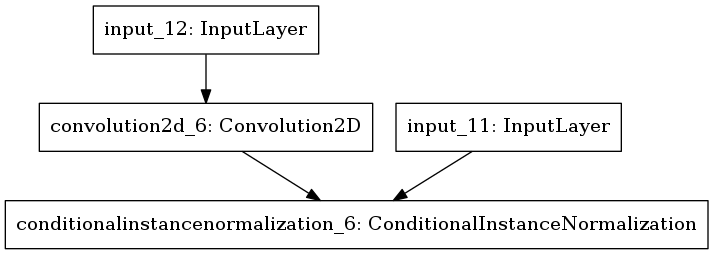

In [36]:
Image('model_5_6.png')

In [71]:
len(arr_hr)

19439

In [ ]:
labels = [1]*5000 + [0]*5000 + [2]*5000